<a href="https://colab.research.google.com/github/PedroDubas/Reconhecer_imagens_Fashion/blob/master/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import os
from keras.datasets import fashion_mnist
from math import ceil, floor
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [0]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()


In [0]:
def plot_image(number):
    fig = plt.figure(figsize = (15,8))
    plt.imshow(trainX[number])
   

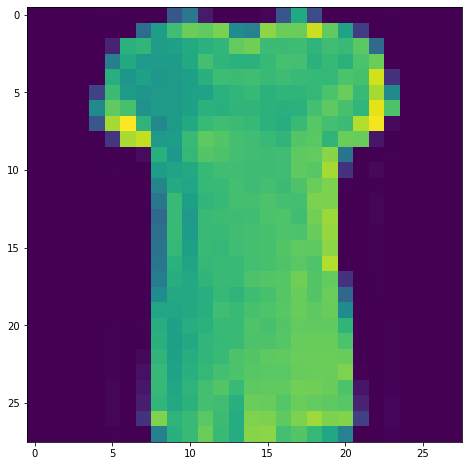

In [0]:
plot_image(321)

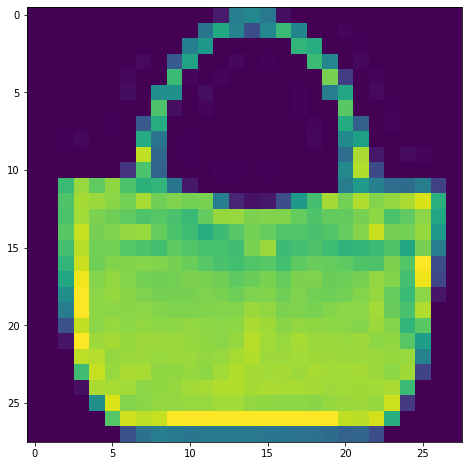

In [0]:
plot_image(100)

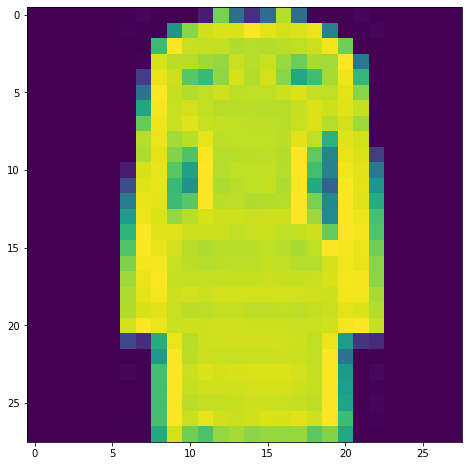

In [0]:
plot_image(500)

In [0]:
batch_size = 100
num_classes = 10
epochs = 10

## First Model - Simple

In [0]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

In [0]:
print('x_train shape:', trainX.shape)
print(trainX.shape[0], 'train samples')
print(testX.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
trainY = keras.utils.to_categorical(trainY, num_classes)
testY = keras.utils.to_categorical(testY, num_classes)

In [0]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255

In [0]:
model = Sequential()
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.fit(trainX, trainY,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(testX, testY))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.6622 - acc: 0.7787 - val_loss: 0.5478 - val_acc: 0.8139
Epoch 2/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.4868 - acc: 0.8353 - val_loss: 0.4931 - val_acc: 0.8337
Epoch 3/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.4567 - acc: 0.8455 - val_loss: 0.4856 - val_acc: 0.8328
Epoch 4/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.4406 - acc: 0.8494 - val_loss: 0.4697 - val_acc: 0.8387
Epoch 5/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.4299 - acc: 0.8534 - val_loss: 0.4663 - val_acc: 0.8408
Epoch 6/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.4236 - acc: 0.8560 - val_loss: 0.4630 - val_acc: 0.8420
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 0

In [0]:
predictions_train = model.predict(trainX)
predictions_test = model.predict(testX)

In [0]:
predictions_train

array([[9.6114327e-13, 1.2131357e-22, 3.1905808e-12, ..., 1.0658331e-03,
        1.0448357e-06, 9.9875093e-01],
       [9.9233234e-01, 3.3935261e-11, 1.2668107e-03, ..., 2.8890674e-36,
        6.2834931e-07, 4.5864166e-22],
       [3.4175083e-01, 4.7352053e-02, 7.8976929e-02, ..., 7.3242579e-11,
        1.4835086e-03, 8.8084898e-06],
       ...,
       [4.9060298e-04, 7.7858727e-05, 7.6613016e-04, ..., 2.1248071e-22,
        1.7317710e-05, 1.6082933e-15],
       [6.0300088e-01, 1.2881086e-03, 2.1866478e-01, ..., 4.2731769e-16,
        3.5409802e-03, 1.3752243e-11],
       [3.5086009e-06, 1.6154861e-08, 7.9126796e-05, ..., 2.0413511e-03,
        1.4877783e-03, 2.9763993e-04]], dtype=float32)

In [0]:
scores = model.evaluate(testX, testY, verbose=1)

10000/10000 [==============================] - 0s 19us/step


In [0]:
print('Test accuracy:', scores[1])

Test accuracy: 0.8463


## Complex Model

In [0]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

In [0]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [0]:
trainY = keras.utils.to_categorical(trainY, num_classes)
testY = keras.utils.to_categorical(testY, num_classes)

In [0]:
trainX.shape

(60000, 28, 28, 1)

In [0]:
testX.shape

(10000, 28, 28, 1)

In [0]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=trainX.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(trainX, trainY,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 402us/step - loss: 0.9413 - acc: 0.7566 - val_loss: 0.3702 - val_acc: 0.8622
Epoch 2/10
60000/60000 [==============================] - 23s 378us/step - loss: 0.3877 - acc: 0.8574 - val_loss: 0.3140 - val_acc: 0.8827
Epoch 3/10
60000/60000 [==============================] - 23s 377us/step - loss: 0.3335 - acc: 0.8767 - val_loss: 0.2846 - val_acc: 0.8965
Epoch 4/10
60000/60000 [==============================] - 23s 378us/step - loss: 0.3056 - acc: 0.8870 - val_loss: 0.2746 - val_acc: 0.9029
Epoch 5/10
60000/60000 [==============================] - 23s 379us/step - loss: 0.2823 - acc: 0.8962 - val_loss: 0.2650 - val_acc: 0.9048
Epoch 6/10
60000/60000 [==============================] - 23s 381us/step - loss: 0.2724 - acc: 0.8997 - val_loss: 0.2515 - val_acc: 0.9100
Epoch 7/10
60000/60000 [==============================] - 23s 381us/step - loss: 0.2537 - acc: 0.9068 - val_loss: 0.

In [0]:
scores = model.evaluate(testX, testY, verbose=1)

10000/10000 [==============================] - 1s 131us/step


In [0]:
print('Test accuracy:', scores[1])

Test accuracy: 0.9166
